In [1]:
class Rakieta:
    def __init__(self, pozycja=(0, 0)):
        self.set_pozycja(pozycja)

    def sprawdz_pozycje(pozycja):
        assert isinstance(pozycja, (tuple, list)), 'pozycja powinna być listą/krotką'
        assert len(pozycja) == 2, 'pozycja powinna mieć 2 elementy'
        assert all([isinstance(el, (int, float)) for el in pozycja]), 'elementy pozycja powinna być liczbami'
        assert pozycja[1] >= 0, 'drugi element pozycji powinien być nieujemny'

    def get_pozycja(self):
        return self.pozycja

    def set_pozycja(self, var):
        __class__.sprawdz_pozycje(var)
        self.pozycja = var

    def przesun_rakiete(self, przesuniecie):
        x, y = self.get_pozycja()  # czytaj obecną pozycję
        dx, dy = przesuniecie  # przesuniecie
        nowa_pozycja = (x + dx, y + dy)  # ustaw nową pozycję
        self.set_pozycja(nowa_pozycja)

    def w_gore(self, var):
        self.przesun_rakiete((0, var))

    def w_dol(self, var):
        self.przesun_rakiete((0, -var))

    def w_prawo(self, var):
        self.przesun_rakiete((var, 0))

    def w_lewo(self, var):
        self.przesun_rakiete((-var, 0))

    def laduj(self):
        x, y = self.get_pozycja()
        self.set_pozycja((x, 0))

    def __repr__(self):
        return f'Rakieta w pozycji {self.get_pozycja()}'

    def __str__(self):
        return self.__repr__()

[(0, 0), (0, 10), (89, 1), (160, 1), (220, 1), (256, 4), (319, 4), (233, 4), (175, 8), (173, 0), (191, 5), (268, 5), (268, 0)]


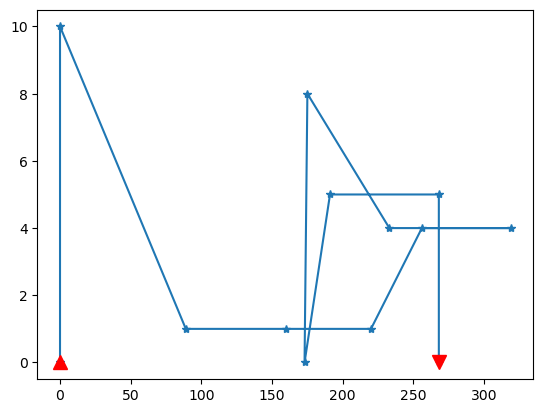

In [2]:
import random

rakieta = Rakieta()
pozycja = []
pozycja.append(rakieta.get_pozycja())

# start pionowy
rakieta.w_gore(10)
pozycja.append(rakieta.get_pozycja())

ilosc_skokow = 10
for i in range(ilosc_skokow):
    # góra czy dół?
    dy = random.randint(0, 10)
    if random.random() > 0.5:
        rakieta.w_gore(dy)
    else:
        try:
            rakieta.w_dol(dy)
        except:
            pass

    # lewo czy prawo?
    dx = random.randint(0, 100)
    if random.random() > 0.5:
        rakieta.w_prawo(dx)
    else:
        rakieta.w_lewo(dx)

    pozycja.append(rakieta.get_pozycja())

#lądujemy
rakieta.laduj()
pozycja.append(rakieta.get_pozycja())
print(pozycja)

### Odkomentuj jeżeli chcesz zobaczyć jak latała rakieta...
import pylab
%matplotlib inline
x, y = zip(*pozycja)
pylab.plot(x, y, '*-')
pylab.plot(x[:1], y[:1], '^r', markersize=10)
pylab.plot(x[-1:], y[-1:], 'vr', markersize=10)